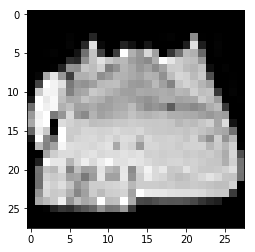

In [1]:
#Creating Artificial Neural Network from scratch and train it on fashion-mnist dataset. 
# The dataset have 10 categories of images.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

train_dataset = pd.read_csv('fashion-mnist_train.csv')
X_train = np.array(train_dataset.loc[:,'pixel1':'pixel784']) # train set features 
Y_train = np.array(train_dataset['label']) # train set labels 
Y_train = Y_train.reshape((Y_train.shape[0],1))
 
test_dataset = pd.read_csv('fashion-mnist_test.csv') 
X_test = np.array(test_dataset.loc[:,'pixel1':'pixel784']) # test set features 
Y_test = np.array(test_dataset['label']) # test set labels 
Y_test = Y_test.reshape((Y_test.shape[0],1))
 
# Example of a picture 
index=100
img=np.array(train_dataset.loc[index,'pixel1':'pixel784']).reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()


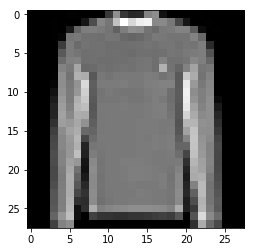

In [2]:
#Displaying a random image
index=7654
img=np.array(train_dataset.loc[index,'pixel1':'pixel784']).reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()

In [3]:
Xn_train=X_train
yn_train=Y_train

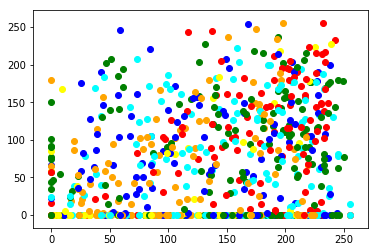

In [18]:
# Displaying the image points on a scatter plot
color=None;
for i in range(yn_train.shape[0]):
    if yn_train[i]==1:
        color='red'
    elif yn_train[i]==2:
        color='blue'
    elif yn_train[i]==3:
        color='cyan'
    elif yn_train[i]==4:
        color='green'
    elif yn_train[i]==5:
        color='yellow'  
    elif yn_train[i]==6:
        color='orange'    
    plt.scatter(Xn_train[i,156],Xn_train[i,16],c=color)

In [108]:
#With bias and two hidden layer
import time
import random
import numpy as np

# using softmax at the output layer
def softmax(x):
    e = np.exp(x)
    result = e / np.sum(e)
    return result

# using tanh at the hidden layer
def tanh(x):
    return np.tanh(x)
 
# derivative for tanh function
def d_tanh(y):
    return 1 - y*y

class Neural_Net():

    def __init__(self, input_unit, hidden_unit1,hidden_unit2, output_unit, 
                 epoch = 100, l_rate = 0.01, reg_in = 0, reg_hid1 = 0,reg_hid2=0, momentum = 0):
       
        # initialize parameters
        self.epoch = epoch
        self.l_rate = l_rate
        self.reg_in = reg_in
        self.reg_hid1 = reg_hid1
        self.reg_hid2 = reg_hid2
        self.momentum = momentum
        
        # initialize number of input,hidden and output units
        self.input_unit = input_unit
        self.hidden_unit1 = hidden_unit1
        self.hidden_unit2 = hidden_unit2
        self.output_unit = output_unit

        # set array of ones at each layer at first
        self.a_input = np.ones(self.input_unit+1)# added 1 for bias node in input unit
        self.a_hidden1 = np.ones(self.hidden_unit1+1)# added 1 for bias node in hidden unit
        self.a_hidden2 = np.ones(self.hidden_unit2+1)
        self.a_output = np.ones(self.output_unit)

        # create random weight matrices
        in_range = 1.0 / self.input_unit ** (1/2)
        out_range1 = 1.0 / self.hidden_unit1 ** (1/2)
        out_range2 = 1.0 / self.hidden_unit2 ** (1/2)
        self.w_i = np.random.normal(loc = 0, scale = in_range, size = (self.input_unit+1, self.hidden_unit1))
        self.w_h1 = np.random.normal(loc = 0, scale = out_range1, size = (self.hidden_unit1+1, self.hidden_unit2))
        self.w_h2 = np.random.normal(loc = 0, scale = out_range2, size = (self.hidden_unit2+1, self.output_unit))
        self.dw_i = np.zeros((self.input_unit+1, self.hidden_unit1))
        self.dw_h1 = np.zeros((self.hidden_unit1+1, self.hidden_unit2))
        self.dw_h2 = np.zeros((self.hidden_unit2+1, self.output_unit))

    def feedForward(self, inputs):

        # input activations
        self.a_input[0:self.input_unit ] = inputs

        # hidden1 activations
        sum = np.dot(self.w_i.T, self.a_input)
        self.a_hidden1[0:self.hidden_unit1] = tanh(sum)
        
         # hidden2 activations
        sum = np.dot(self.w_h1.T, self.a_hidden1)
        self.a_hidden2[0:self.hidden_unit2] = tanh(sum)
        
        # output activations
        sum = np.dot(self.w_h2.T, self.a_hidden2)
        self.a_output = softmax(sum)
        return self.a_output

    def backPropagate(self, targets):
        
        # calculate error terms for output
        # the delta (theta) tell you which direction to change the weights
        out_deltas = -(targets - self.a_output)
     
        # calculate error terms for hidden
        # delta (theta) tells you which direction to change the weights
        error = np.dot(self.w_h2, out_deltas)
        
        h_deltas2 = d_tanh(self.a_hidden2) * error
        error = np.dot(self.w_h1, h_deltas2[:self.hidden_unit2]) 
        h_deltas1 = d_tanh(self.a_hidden1) * error
            
        # update the weights connecting hidden2 to output, change == partial derivative
        w_change = out_deltas * np.reshape(self.a_hidden2, (self.a_hidden2.shape[0],1))
        regn = self.reg_hid2 * self.w_h2
        self.w_h2 -= self.l_rate * (w_change+regn)+ self.dw_h2* self.momentum 
        self.dw_h2 = w_change 
        
        # update the weights connecting input to hidden, change == partial derivative
        w_change = h_deltas2[:self.hidden_unit2] * np.reshape(self.a_hidden1, (self.a_hidden1.shape[0], 1))
        regn = self.reg_hid1 * self.w_h1
        self.w_h1 -= self.l_rate * (w_change+regn)+ self.dw_h1* self.momentum 
        self.dw_h1 = w_change

        # update the weights connecting input to hidden, change == partial derivative
        w_change = h_deltas1[:self.hidden_unit1] * np.reshape(self.a_input, (self.a_input.shape[0], 1))
        regn = self.reg_in * self.w_i
        self.w_i -= self.l_rate * (w_change+regn)+ self.dw_i* self.momentum 
        self.dw_i = w_change

        # calculate error
        final_cost = -sum(targets * np.log(self.a_output))    
        return final_cost


    def fit(self, p_patterns):
        costs=[]
                      
        num_rows = np.shape(p_patterns)[0]
               
        for i in range(self.epoch):
            cost = 0.0
            random.shuffle(p_patterns)
            for p in p_patterns:
                inputs = p[0]
                targets = p[1]
                self.feedForward(inputs)
                cost += self.backPropagate(targets)            

                           
            if i % 10 == 0:
                #Finding average cost per row
                cost= cost/num_rows
                costs.append(cost)
                print('Training error %-.5f' % cost)
              
            # learning rate decay
            #self.l_rate = self.l_rate * self.l_rate

        plt.plot(costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost function")
        plt.show()         

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.feedForward(x))
        return predictions

In [5]:
#Function loading and engineering the data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

def load_data():
    data = Xn_train
    
    # y value is encoded into 10 columns of 0s and 1s
    y=np.zeros((yn_train.shape[0],10))
    for i in range(0,yn_train.shape[0]):
        y[i,yn_train[i]]=1
       
    data = Xn_train.astype('float64') # x data converted to float type for scaling
    data = scale(data)
    data_tuple = []

    # create a tuple list with the data
    for i in range(data.shape[0]):
        tuplelist = list((data[i,:].tolist(), y[i].tolist()))
        data_tuple.append(tuplelist)
    return data_tuple

Training error 0.65597
Training error 0.33402
Training error 0.26387
Training error 0.20515
Training error 0.17985
Training error 0.17107
Training error 0.16385
Training error 0.14440
Training error 0.12557
Training error 0.12754
Training error 0.13225
Training error 0.14095
Training error 0.13684
Training error 0.08759
Training error 0.18940
Training error 0.07668
Training error 0.05961
Training error 0.08574
Training error 0.08013
Training error 0.12919


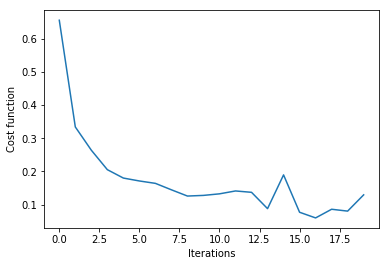

816.4046802520752
Prediction Accuracy for the training set
0.749
Prediction Accuracy for the testing set
0.715


In [119]:
start = time.time()
X = load_data()

NN_model = Neural_Net(784, 20,5, 10, epoch = 200, l_rate = 0.001, reg_in = 0.04, reg_hid1 = 0.04,reg_hid2=0.04,momentum = 0.01)
NN_model.fit(X)

end = time.time()
print(end - start)

#Prediction Accuracy for the training and testing set
predictions=NN_model.predict(Xn_train)
y_predict=np.argmax(predictions, axis=1)
print("Prediction Accuracy for the training set")
print(accuracy_score(yn_train,y_predict))

predictions=NN_model.predict(X_test)
y_predict=np.argmax(predictions, axis=1)
print("Prediction Accuracy for the testing set")
print(accuracy_score(Y_test,y_predict))